In [43]:
# load libaries
import numpy as np
import pandas as pd

In [44]:
df=pd.read_csv('FloodPoint.csv')
df.head()

,rID,flood,coords_x,coords_y,aspect,dem,land,plan,pre,riverdis,roaddis,slope,soil,twi,Target_Ris
0,1,1,228894.4512,3828008.595,161,1540,10,0,393,3713,1062,0,7.0,12,5
1,2,1,227402.3068,3832861.719,73,1529,10,0,391,3131,751,4,7.0,10,5
2,3,1,218155.1974,3842941.184,153,1579,10,0,392,2768,751,2,12.0,0,5
3,4,1,223411.3645,3849609.256,-1,1561,10,-8,386,3914,1062,0,12.0,15,5
4,5,1,233028.4153,3855851.624,180,1578,10,8,377,2822,751,0,2.0,7,5


In [45]:
df.shape

(414, 15)

In [46]:
df['Target_Ris'].value_counts()

5    117
1     95
2     84
3     64
4     54
Name: Target_Ris, dtype: int64

In [47]:
df.drop('rID',axis=1,inplace=True)
# Remove rows with any None values
df.dropna(inplace=True)
df.tail()

,flood,coords_x,coords_y,aspect,dem,land,plan,pre,riverdis,roaddis,slope,soil,twi,Target_Ris
409,1,221530.0,3798410.0,252,1762,4,0,410,553,13939,33,6.0,4,2
410,1,224511.0,3795770.0,329,1906,3,-7,411,0,10215,4,11.0,13,2
411,1,224045.0,3800680.0,14,1743,6,0,408,553,11265,16,12.0,4,2
412,1,225970.0,3799780.0,128,1729,3,0,408,1237,10514,19,12.0,11,2
413,1,224573.0,3795930.0,237,1908,3,0,410,0,10215,3,11.0,14,2


In [48]:
# Feature Variables 
features = df.drop('Target_Ris',axis=1)
# Target/Dependent Variable - Outcome
target = df['Target_Ris']
#Conver to Numpy array
features = np.array(features)
target = np.array(target)

Normalize

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features =scaler.fit_transform(features)

Train/Test Split

In [50]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(features,target,test_size=0.2,stratify=target)

In [51]:
x_train.shape,y_train.shape

((324, 13), (324,))

In [52]:
x_test.shape,y_test.shape

((81, 13), (81,))

Naive Bayes Classifier

In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
# Train the Model
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [55]:
# Predict Outcome
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score

#Precision
precision_train = precision_score(y_true=y_train,y_pred=y_pred_train,average='macro')
precision_test = precision_score(y_true=y_test,y_pred=y_pred_test,average='macro')

#Recall
recall_train = recall_score(y_true=y_train,y_pred=y_pred_train,average='macro')
recall_test = recall_score(y_true=y_test,y_pred=y_pred_test,average='macro')

#ACC
acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)

#F1_score
f1_train = f1_score(y_true=y_train,y_pred=y_pred_train,average='macro')
f1_test = f1_score(y_true=y_test,y_pred=y_pred_test,average='macro')

print(f'Precision:\n Train:\n {precision_train}\n Test:\n {precision_test}\n')
print(f'Recall:\n Train:\n {recall_train}\n Test:\n {recall_test}\n')
print(f'Accuracy:\n Train:\n {acc_train}\n Test:\n {acc_test}\n')
print(f'F1 score:\n Train:\n {f1_train}\n Test:\n {f1_test}\n')

Precision:
 Train:
 0.611429764416315
 Test:
 0.5408153233324857

Recall:
 Train:
 0.5812715704232141
 Test:
 0.5921442993673443

Accuracy:
 Train:
 0.6018518518518519
 Test:
 0.6419753086419753

F1 score:
 Train:
 0.5288350121264911
 Test:
 0.5369314394486019



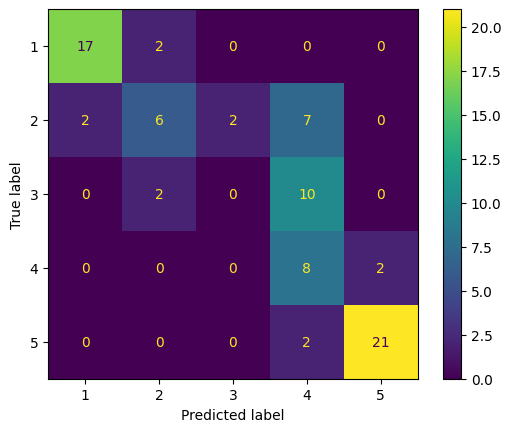

In [59]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [60]:
import pickle
# save model
with open('NaiveBayes.pkl','wb') as f:
    pickle.dump(model,f)

KNN (k Nearest Neighbors)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn =KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [62]:
# Predict Outcome
y_pred_train =knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score

#Precision
precision_train = precision_score(y_true=y_train,y_pred=y_pred_train,average='macro')
precision_test = precision_score(y_true=y_test,y_pred=y_pred_test,average='macro')

#Recall
recall_train = recall_score(y_true=y_train,y_pred=y_pred_train,average='macro')
recall_test = recall_score(y_true=y_test,y_pred=y_pred_test,average='macro')

#ACC
acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)

#F1_score
f1_train = f1_score(y_true=y_train,y_pred=y_pred_train,average='macro')
f1_test = f1_score(y_true=y_test,y_pred=y_pred_test,average='macro')

print(f'Precision:\n Train:\n {precision_train}\n Test:\n {precision_test}\n')
print(f'Recall:\n Train:\n {recall_train}\n Test:\n {recall_test}\n')
print(f'Accuracy:\n Train:\n {acc_train}\n Test:\n {acc_test}\n')
print(f'F1 score:\n Train:\n {f1_train}\n Test:\n {f1_test}\n')

Precision:
 Train:
 0.7560272448140095
 Test:
 0.6706926406926407

Recall:
 Train:
 0.7337266621678075
 Test:
 0.6473082963162381

Accuracy:
 Train:
 0.7777777777777778
 Test:
 0.691358024691358

F1 score:
 Train:
 0.7385808204109605
 Test:
 0.6385346901017577



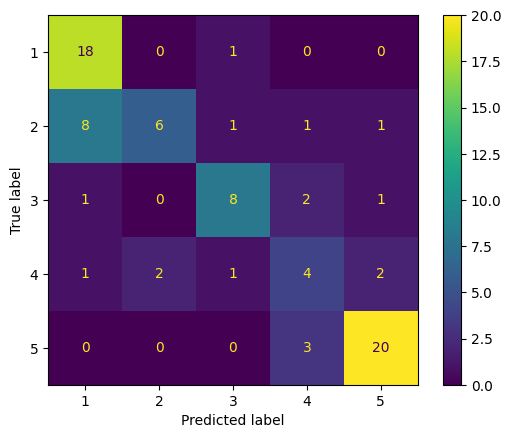

In [64]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [59]:
import pickle
# save model
with open('knn.pkl','wb') as f:
    pickle.dump(knn,f)
# load Model
with open('knn.pkl', 'rb') as f:
    knn = pickle.load(f)    

Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=8,min_samples_split=4,min_samples_leaf=2)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=4)

In [66]:
# Predict Outcome
y_pred_train =dt.predict(x_train)
y_pred_test = dt.predict(x_test)

In [67]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score

#Precision
precision_train = precision_score(y_true=y_train,y_pred=y_pred_train,average='macro')
precision_test = precision_score(y_true=y_test,y_pred=y_pred_test,average='macro')

#Recall
recall_train = recall_score(y_true=y_train,y_pred=y_pred_train,average='macro')
recall_test = recall_score(y_true=y_test,y_pred=y_pred_test,average='macro')

#ACC
acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)

#F1_score
f1_train = f1_score(y_true=y_train,y_pred=y_pred_train,average='macro')
f1_test = f1_score(y_true=y_test,y_pred=y_pred_test,average='macro')

print(f'Precision:\n Train:\n {precision_train}\n Test:\n {precision_test}\n')
print(f'Recall:\n Train:\n {recall_train}\n Test:\n {recall_test}\n')
print(f'Accuracy:\n Train:\n {acc_train}\n Test:\n {acc_test}\n')
print(f'F1 score:\n Train:\n {f1_train}\n Test:\n {f1_test}\n')

Precision:
 Train:
 0.9322468036958712
 Test:
 0.7380399906998372

Recall:
 Train:
 0.9242395321186413
 Test:
 0.7337726028626554

Accuracy:
 Train:
 0.9351851851851852
 Test:
 0.7654320987654321

F1 score:
 Train:
 0.9272990319482499
 Test:
 0.7333292548566445



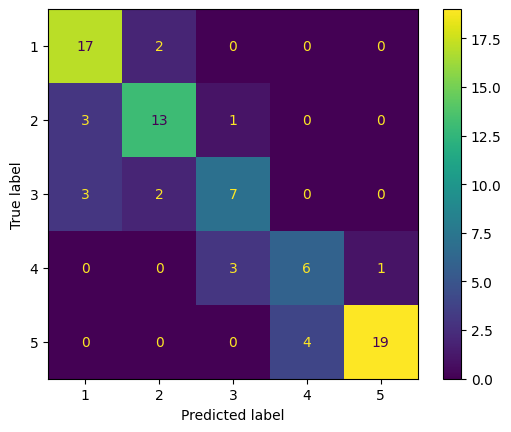

In [68]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [71]:
import pickle
# save model
with open('DecisionTree.pkl','wb') as f:
    pickle.dump(dt,f)
# load Model
with open('DecisionTree.pkl', 'rb') as f:
    dt = pickle.load(f)    

Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_depth=8,min_samples_split=4,min_samples_leaf=2)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=4)

In [70]:
# Predict Outcome
y_pred_train =rf.predict(x_train)
y_pred_test = rf.predict(x_test)

In [71]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score

#Precision
precision_train = precision_score(y_true=y_train,y_pred=y_pred_train,average='macro')
precision_test = precision_score(y_true=y_test,y_pred=y_pred_test,average='macro')

#Recall
recall_train = recall_score(y_true=y_train,y_pred=y_pred_train,average='macro')
recall_test = recall_score(y_true=y_test,y_pred=y_pred_test,average='macro')

#ACC
acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)

#F1_score
f1_train = f1_score(y_true=y_train,y_pred=y_pred_train,average='macro')
f1_test = f1_score(y_true=y_test,y_pred=y_pred_test,average='macro')

print(f'Precision:\n Train:\n {precision_train}\n Test:\n {precision_test}\n')
print(f'Recall:\n Train:\n {recall_train}\n Test:\n {recall_test}\n')
print(f'Accuracy:\n Train:\n {acc_train}\n Test:\n {acc_test}\n')
print(f'F1 score:\n Train:\n {f1_train}\n Test:\n {f1_test}\n')

Precision:
 Train:
 0.9871078649306659
 Test:
 0.7899585921325051

Recall:
 Train:
 0.9805469327420546
 Test:
 0.7595293220262933

Accuracy:
 Train:
 0.9845679012345679
 Test:
 0.8024691358024691

F1 score:
 Train:
 0.983651315483234
 Test:
 0.7628385944735327



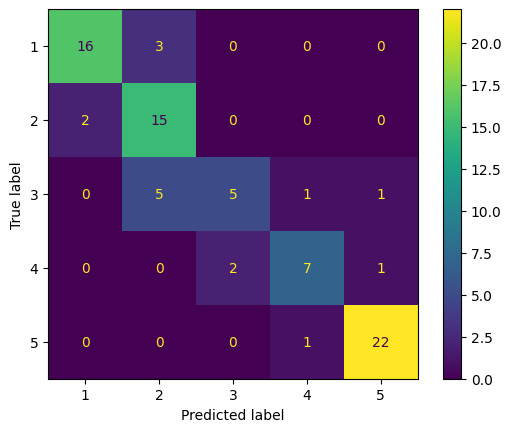

In [72]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [73]:
import pickle
# save model
with open('RandomForest.pkl','wb') as f:
    pickle.dump(rf,f)
# load Model
with open('RandomForest.pkl', 'rb') as f:
    rf = pickle.load(f)    

SVM (Support Vector Machine)

In [73]:
from sklearn import svm

#support vector clsssifier
#support vector kernel = linear
svm_model = svm.SVC(kernel='linear')
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [74]:
# Predict Outcome
y_pred_train =svm_model.predict(x_train)
y_pred_test = svm_model.predict(x_test)

In [75]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score

#Precision
precision_train = precision_score(y_true=y_train,y_pred=y_pred_train,average='macro')
precision_test = precision_score(y_true=y_test,y_pred=y_pred_test,average='macro')

#Recall
recall_train = recall_score(y_true=y_train,y_pred=y_pred_train,average='macro')
recall_test = recall_score(y_true=y_test,y_pred=y_pred_test,average='macro')

#ACC
acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)

#F1_score
f1_train = f1_score(y_true=y_train,y_pred=y_pred_train,average='macro')
f1_test = f1_score(y_true=y_test,y_pred=y_pred_test,average='macro')

print(f'Precision:\n Train:\n {precision_train}\n Test:\n {precision_test}\n')
print(f'Recall:\n Train:\n {recall_train}\n Test:\n {recall_test}\n')
print(f'Accuracy:\n Train:\n {acc_train}\n Test:\n {acc_test}\n')
print(f'F1 score:\n Train:\n {f1_train}\n Test:\n {f1_test}\n')

Precision:
 Train:
 0.8244407900439714
 Test:
 0.8730952380952381

Recall:
 Train:
 0.8157064173013271
 Test:
 0.8631928927177277

Accuracy:
 Train:
 0.8302469135802469
 Test:
 0.8765432098765432

F1 score:
 Train:
 0.8176426669056088
 Test:
 0.864263957083106



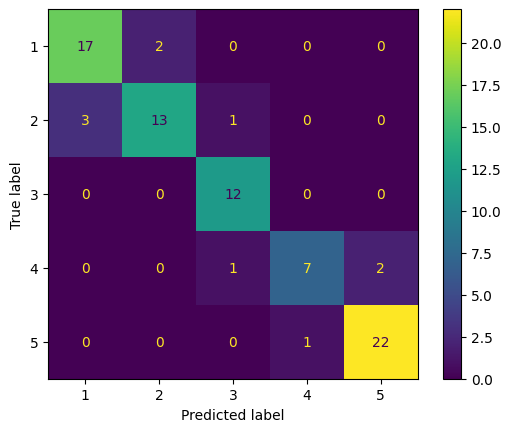

In [76]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_model.classes_)
disp.plot()
plt.show()

In [77]:
from sklearn import svm

#support vector clsssifier
#support vector kernel = RBF
svm_rbf_model = svm.SVC(kernel='rbf')
svm_rbf_model.fit(x_train,y_train)

SVC()

In [78]:
# Predict Outcome
y_pred_train =svm_rbf_model.predict(x_train)
y_pred_test = svm_rbf_model.predict(x_test)

In [79]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score

#Precision
precision_train = precision_score(y_true=y_train,y_pred=y_pred_train,average='macro')
precision_test = precision_score(y_true=y_test,y_pred=y_pred_test,average='macro')

#Recall
recall_train = recall_score(y_true=y_train,y_pred=y_pred_train,average='macro')
recall_test = recall_score(y_true=y_test,y_pred=y_pred_test,average='macro')

#ACC
acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)

#F1_score
f1_train = f1_score(y_true=y_train,y_pred=y_pred_train,average='macro')
f1_test = f1_score(y_true=y_test,y_pred=y_pred_test,average='macro')

print(f'Precision:\n Train:\n {precision_train}\n Test:\n {precision_test}\n')
print(f'Recall:\n Train:\n {recall_train}\n Test:\n {recall_test}\n')
print(f'Accuracy:\n Train:\n {acc_train}\n Test:\n {acc_test}\n')
print(f'F1 score:\n Train:\n {f1_train}\n Test:\n {f1_test}\n')

Precision:
 Train:
 0.8978379903099489
 Test:
 0.8095454545454546

Recall:
 Train:
 0.8806603039943444
 Test:
 0.7463301476196886

Accuracy:
 Train:
 0.9012345679012346
 Test:
 0.7901234567901234

F1 score:
 Train:
 0.8855608629857237
 Test:
 0.747730558232634



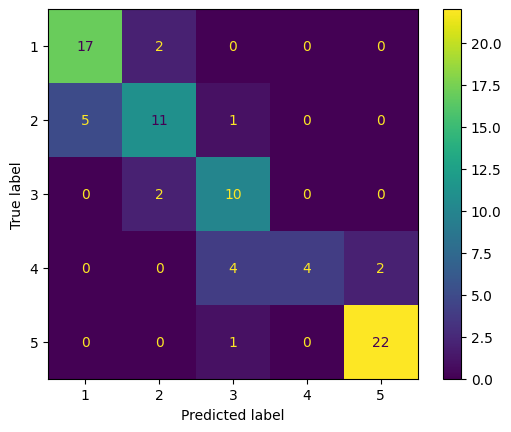

In [80]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_model.classes_)
disp.plot()
plt.show()

In [81]:
from sklearn import svm

#support vector clsssifier
#support vector kernel = sigmoid
svm_sigmoid_model = svm.SVC(kernel='sigmoid')
svm_sigmoid_model.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [82]:
# Predict Outcome
y_pred_train =svm_rbf_model.predict(x_train)
y_pred_test = svm_rbf_model.predict(x_test)

In [83]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score

#Precision
precision_train = precision_score(y_true=y_train,y_pred=y_pred_train,average='macro')
precision_test = precision_score(y_true=y_test,y_pred=y_pred_test,average='macro')

#Recall
recall_train = recall_score(y_true=y_train,y_pred=y_pred_train,average='macro')
recall_test = recall_score(y_true=y_test,y_pred=y_pred_test,average='macro')

#ACC
acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)

#F1_score
f1_train = f1_score(y_true=y_train,y_pred=y_pred_train,average='macro')
f1_test = f1_score(y_true=y_test,y_pred=y_pred_test,average='macro')

print(f'Precision:\n Train:\n {precision_train}\n Test:\n {precision_test}\n')
print(f'Recall:\n Train:\n {recall_train}\n Test:\n {recall_test}\n')
print(f'Accuracy:\n Train:\n {acc_train}\n Test:\n {acc_test}\n')
print(f'F1 score:\n Train:\n {f1_train}\n Test:\n {f1_test}\n')

Precision:
 Train:
 0.8978379903099489
 Test:
 0.8095454545454546

Recall:
 Train:
 0.8806603039943444
 Test:
 0.7463301476196886

Accuracy:
 Train:
 0.9012345679012346
 Test:
 0.7901234567901234

F1 score:
 Train:
 0.8855608629857237
 Test:
 0.747730558232634



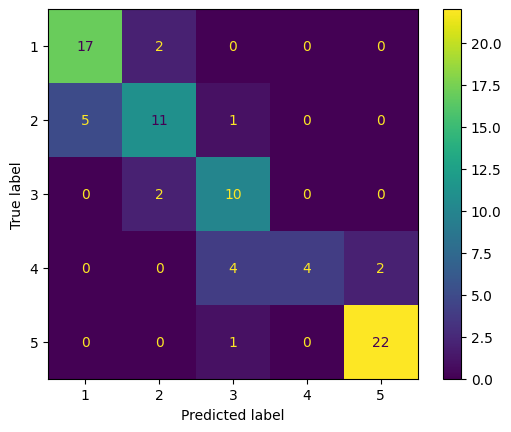

In [84]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_model.classes_)
disp.plot()
plt.show()

In [88]:
import pickle
# save model
with open('SVM.pkl','wb') as f:
    pickle.dump(svm_model,f)
# load Model
with open('SVM.pkl', 'rb') as f:
    svm_model = pickle.load(f)    

Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
LR_model =LogisticRegression()
LR_model.fit(x_train,y_train)

LogisticRegression()

In [86]:
# Predict Outcome
y_pred_train =LR_model.predict(x_train)
y_pred_test = LR_model.predict(x_test)

In [87]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score

#Precision
precision_train = precision_score(y_true=y_train,y_pred=y_pred_train,average='macro')
precision_test = precision_score(y_true=y_test,y_pred=y_pred_test,average='macro')

#Recall
recall_train = recall_score(y_true=y_train,y_pred=y_pred_train,average='macro')
recall_test = recall_score(y_true=y_test,y_pred=y_pred_test,average='macro')

#ACC
acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)

#F1_score
f1_train = f1_score(y_true=y_train,y_pred=y_pred_train,average='macro')
f1_test = f1_score(y_true=y_test,y_pred=y_pred_test,average='macro')

print(f'Precision:\n Train:\n {precision_train}\n Test:\n {precision_test}\n')
print(f'Recall:\n Train:\n {recall_train}\n Test:\n {recall_test}\n')
print(f'Accuracy:\n Train:\n {acc_train}\n Test:\n {acc_test}\n')
print(f'F1 score:\n Train:\n {f1_train}\n Test:\n {f1_test}\n')

Precision:
 Train:
 0.7879693486590037
 Test:
 0.8314997080214471

Recall:
 Train:
 0.7657325106847908
 Test:
 0.8263301476196887

Accuracy:
 Train:
 0.7932098765432098
 Test:
 0.8395061728395061

F1 score:
 Train:
 0.7719285600960994
 Test:
 0.8272254004576659



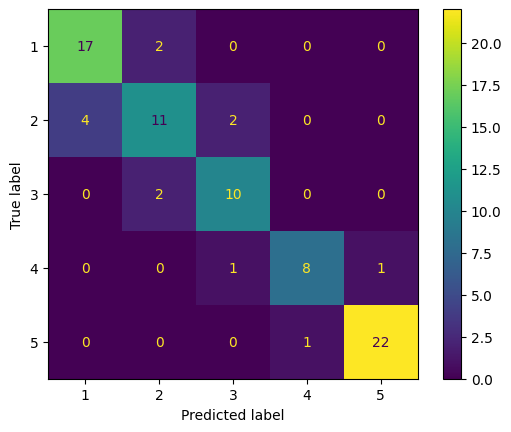

In [88]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=LR_model.classes_)
disp.plot()
plt.show()

ANN (Artificial Neural Network)

In [89]:
from sklearn.neural_network import MLPClassifier

MLP_model =MLPClassifier(hidden_layer_sizes=64,max_iter=100,solver="adam")
MLP_model.fit(x_train,y_train)

c:\Users\User\.conda\envs\cv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=64, max_iter=100)

In [90]:
# Predict Outcome
y_pred_train =MLP_model.predict(x_train)
y_pred_test = MLP_model.predict(x_test)

In [91]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score

#Precision
precision_train = precision_score(y_true=y_train,y_pred=y_pred_train,average='macro')
precision_test = precision_score(y_true=y_test,y_pred=y_pred_test,average='macro')

#Recall
recall_train = recall_score(y_true=y_train,y_pred=y_pred_train,average='macro')
recall_test = recall_score(y_true=y_test,y_pred=y_pred_test,average='macro')

#ACC
acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)

#F1_score
f1_train = f1_score(y_true=y_train,y_pred=y_pred_train,average='macro')
f1_test = f1_score(y_true=y_test,y_pred=y_pred_test,average='macro')

print(f'Precision:\n Train:\n {precision_train}\n Test:\n {precision_test}\n')
print(f'Recall:\n Train:\n {recall_train}\n Test:\n {recall_test}\n')
print(f'Accuracy:\n Train:\n {acc_train}\n Test:\n {acc_test}\n')
print(f'F1 score:\n Train:\n {f1_train}\n Test:\n {f1_test}\n')

Precision:
 Train:
 0.7854844162359048
 Test:
 0.8143275896217073

Recall:
 Train:
 0.7643775185577943
 Test:
 0.7416924664602683

Accuracy:
 Train:
 0.8024691358024691
 Test:
 0.7901234567901234

F1 score:
 Train:
 0.7704876263774547
 Test:
 0.7580533020303465



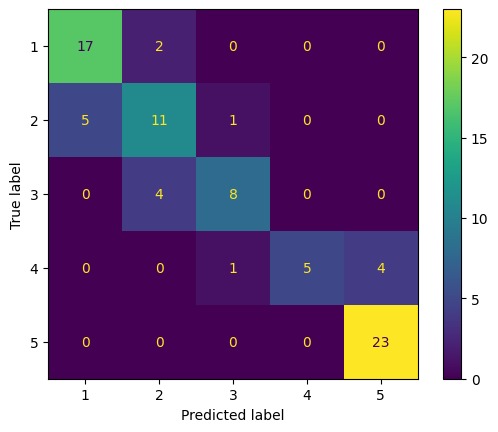

In [92]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=MLP_model.classes_)
disp.plot()
plt.show()

k-means

In [94]:
from sklearn.cluster import KMeans
KMeans_model = KMeans(n_clusters=3)
KMeans_model.fit(x_train)

c:\Users\User\.conda\envs\cv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [95]:
centers = KMeans_model.cluster_centers_
labels = KMeans_model.labels_

In [96]:
centers

array([[ 0.18410873,  0.92029469, -0.69563134,  0.17265434,  0.29683515,
        -0.29906207,  0.00733348, -0.65068219, -0.05599838, -0.07347889,
        -0.13350757, -0.42888863,  0.01743133],
       [-0.4888383 , -0.86451761,  0.59513193, -0.09156073,  0.66414645,
         0.20207505,  0.06218858,  0.67440032,  0.08652865,  0.83615323,
         0.86401469,  0.24305256,  0.13943218],
       [ 0.26266101, -0.7538039 ,  0.64424699, -0.11440736, -1.1006134 ,
         0.21584764,  0.12264201,  0.45930919, -0.04045847, -0.60259867,
        -0.63657694,  0.46687215, -0.21839692]])

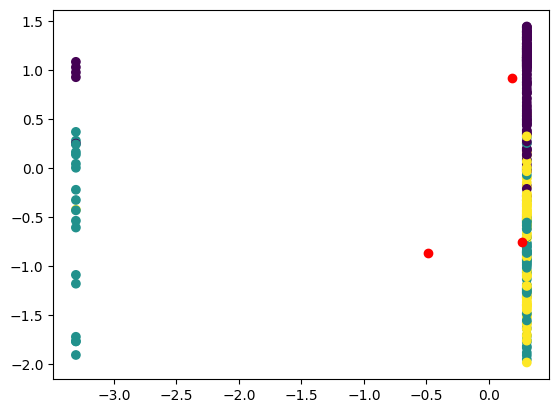

In [97]:
import matplotlib.pyplot as plt
plt.scatter(x_train[:,0],x_train[:,1],c=labels)
plt.scatter(centers[:,0],centers[:,1],c='r')
plt.show()

In [98]:
from sklearn.datasets import make_blobs


#Y:index of cluster
X,y = make_blobs(n_samples=300,n_features=2,centers=3)

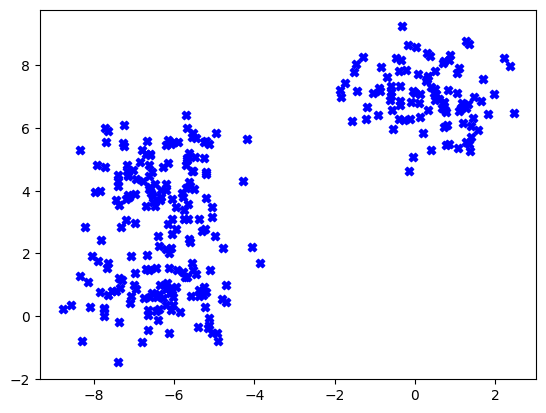

In [99]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c='b',marker='X')
plt.show()

In [100]:
from sklearn.cluster import KMeans
KMeans_model = KMeans(n_clusters=3)
KMeans_model.fit(X)

c:\Users\User\.conda\envs\cv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [101]:
centers = KMeans_model.cluster_centers_
labels = KMeans_model.labels_

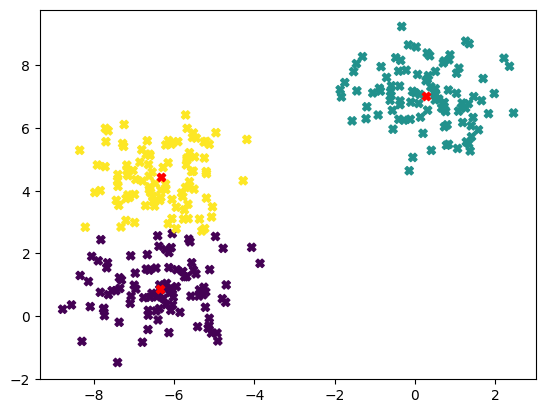

In [102]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=labels,marker='X')
plt.scatter(centers[:,0],centers[:,1],c='r',marker='X')
plt.show()

PCA (Principle Component Analysis)

In [103]:
from sklearn.decomposition import PCA

pca =PCA(n_components=3)
pca.fit(x_train)

PCA(n_components=3)

In [104]:
x_new_train =pca.transform(x_train)
x_new_test =pca.transform(x_test)

In [105]:
x_train.shape,x_new_train.shape

((324, 13), (324, 3))

In [106]:
x_test.shape,x_new_test.shape

((81, 13), (81, 3))

In [107]:
from sklearn.neural_network import MLPClassifier

MLP_model =MLPClassifier(hidden_layer_sizes=64,max_iter=100,solver="adam")
MLP_model.fit(x_new_train,y_train)

c:\Users\User\.conda\envs\cv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=64, max_iter=100)

In [108]:
# Predict Outcome
y_new_pred_train =MLP_model.predict(x_new_train)
y_new_pred_test = MLP_model.predict(x_new_test)

In [109]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score

#Precision
precision_train = precision_score(y_true=y_train,y_pred=y_pred_train,average='macro')
precision_test = precision_score(y_true=y_test,y_pred=y_pred_test,average='macro')

#Recall
recall_train = recall_score(y_true=y_train,y_pred=y_pred_train,average='macro')
recall_test = recall_score(y_true=y_test,y_pred=y_pred_test,average='macro')

#ACC
acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)

#F1_score
f1_train = f1_score(y_true=y_train,y_pred=y_pred_train,average='macro')
f1_test = f1_score(y_true=y_test,y_pred=y_pred_test,average='macro')

print(f'Precision:\n Train:\n {precision_train}\n Test:\n {precision_test}\n')
print(f'Recall:\n Train:\n {recall_train}\n Test:\n {recall_test}\n')
print(f'Accuracy:\n Train:\n {acc_train}\n Test:\n {acc_test}\n')
print(f'F1 score:\n Train:\n {f1_train}\n Test:\n {f1_test}\n')

Precision:
 Train:
 0.7854844162359048
 Test:
 0.8143275896217073

Recall:
 Train:
 0.7643775185577943
 Test:
 0.7416924664602683

Accuracy:
 Train:
 0.8024691358024691
 Test:
 0.7901234567901234

F1 score:
 Train:
 0.7704876263774547
 Test:
 0.7580533020303465



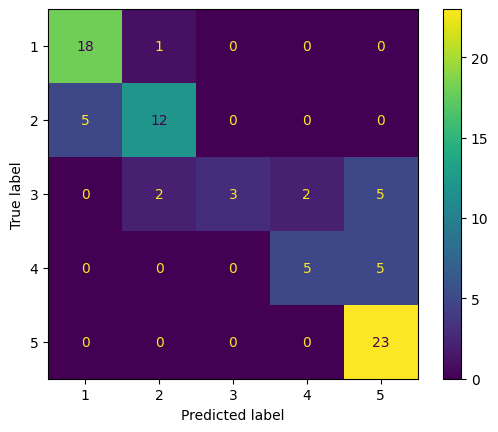

In [110]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_new_pred_test, labels=MLP_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=MLP_model.classes_)
disp.plot()
plt.show()

In [45]:
import pickle
# save model
with open('PCA.pkl','wb') as f:
    pickle.dump(pca,f)
# load Model
with open('PCA.pkl', 'rb') as f:
    pca = pickle.load(f)    

In [46]:
import pickle
# save model
with open('PCA-MLP.pkl','wb') as f:
    pickle.dump(MLP_model,f)
# load Model
with open('PCA-MLP.pkl', 'rb') as f:
    MLP_model = pickle.load(f)    

LDA (Linear Discriminant Analysis)

In [111]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [112]:
# Predict Outcome
y_pred_train =lda.predict(x_train)
y_pred_test = lda.predict(x_test)

In [113]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score

#Precision
precision_train = precision_score(y_true=y_train,y_pred=y_pred_train,average='macro')
precision_test = precision_score(y_true=y_test,y_pred=y_pred_test,average='macro')

#Recall
recall_train = recall_score(y_true=y_train,y_pred=y_pred_train,average='macro')
recall_test = recall_score(y_true=y_test,y_pred=y_pred_test,average='macro')

#ACC
acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)

#F1_score
f1_train = f1_score(y_true=y_train,y_pred=y_pred_train,average='macro')
f1_test = f1_score(y_true=y_test,y_pred=y_pred_test,average='macro')

print(f'Precision:\n Train:\n {precision_train}\n Test:\n {precision_test}\n')
print(f'Recall:\n Train:\n {recall_train}\n Test:\n {recall_test}\n')
print(f'Accuracy:\n Train:\n {acc_train}\n Test:\n {acc_test}\n')
print(f'F1 score:\n Train:\n {f1_train}\n Test:\n {f1_test}\n')

Precision:
 Train:
 0.7335033436694437
 Test:
 0.8045445665445665

Recall:
 Train:
 0.720062212796041
 Test:
 0.7976344954457756

Accuracy:
 Train:
 0.75
 Test:
 0.8148148148148148

F1 score:
 Train:
 0.7218166949792837
 Test:
 0.7986628792825735



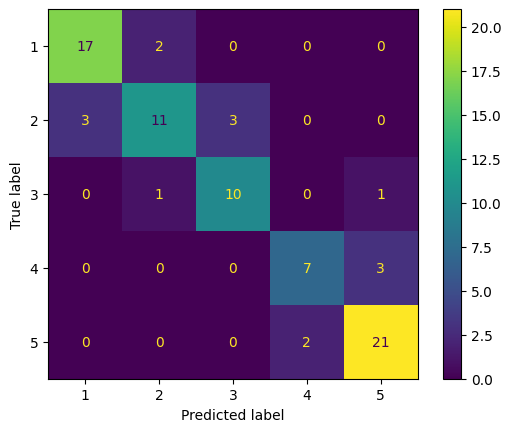

In [114]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_test, labels=lda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lda.classes_)
disp.plot()
plt.show()

In [16]:
import pickle
# save model
with open('LDA.pkl','wb') as f:
    pickle.dump(lda,f)
# load Model
with open('LDA.pkl', 'rb') as f:
    lda = pickle.load(f)    

ICA (Independent Component Analysis)

In [115]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=8)
ica.fit(x_train)

FastICA(n_components=8)

In [116]:
x_new_train =ica.transform(x_train)
x_new_test =ica.transform(x_test)

In [117]:
from sklearn.neural_network import MLPClassifier

MLP_model =MLPClassifier(hidden_layer_sizes=64,max_iter=100,solver="adam")
MLP_model.fit(x_new_train,y_train)

c:\Users\User\.conda\envs\cv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=64, max_iter=100)

In [118]:
# Predict Outcome
y_new_pred_train =MLP_model.predict(x_new_train)
y_new_pred_test = MLP_model.predict(x_new_test)

In [119]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score

#Precision
precision_train = precision_score(y_true=y_train,y_pred=y_pred_train,average='macro')
precision_test = precision_score(y_true=y_test,y_pred=y_pred_test,average='macro')

#Recall
recall_train = recall_score(y_true=y_train,y_pred=y_pred_train,average='macro')
recall_test = recall_score(y_true=y_test,y_pred=y_pred_test,average='macro')

#ACC
acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)

#F1_score
f1_train = f1_score(y_true=y_train,y_pred=y_pred_train,average='macro')
f1_test = f1_score(y_true=y_test,y_pred=y_pred_test,average='macro')

print(f'Precision:\n Train:\n {precision_train}\n Test:\n {precision_test}\n')
print(f'Recall:\n Train:\n {recall_train}\n Test:\n {recall_test}\n')
print(f'Accuracy:\n Train:\n {acc_train}\n Test:\n {acc_test}\n')
print(f'F1 score:\n Train:\n {f1_train}\n Test:\n {f1_test}\n')

Precision:
 Train:
 0.7335033436694437
 Test:
 0.8045445665445665

Recall:
 Train:
 0.720062212796041
 Test:
 0.7976344954457756

Accuracy:
 Train:
 0.75
 Test:
 0.8148148148148148

F1 score:
 Train:
 0.7218166949792837
 Test:
 0.7986628792825735



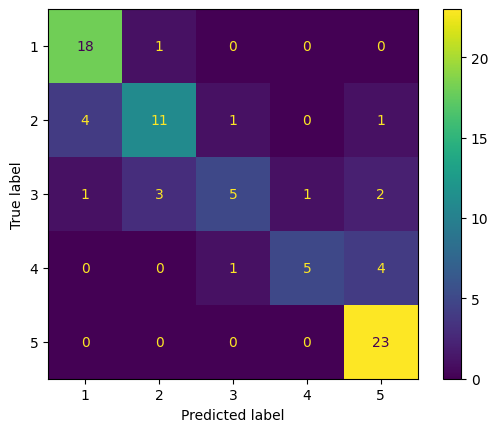

In [120]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_new_pred_test, labels=MLP_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=MLP_model.classes_)
disp.plot()
plt.show()

In [25]:
import pickle
# save MLP model
with open('ICA-MLP.pkl','wb') as f:
    pickle.dump(MLP_model,f)
# load MLP Model
with open('ICA-MLP.pkl', 'rb') as f:
    MLP_model = pickle.load(f)    
# save ICA model
with open('ICA.pkl','wb') as f:
    pickle.dump(ica,f)
# load ICA Model
with open('ICA.pkl', 'rb') as f:
    ica = pickle.load(f)        